# 1. Import data

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api
import numpy as np
import sklearn
from sklearn import cluster
drive.mount('drive')

Mounted at drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/projet_2023/Dataset_complete.csv')

In [ ]:
data['range_skew']=abs(data['range_skew'])
data

,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,0.000000,30.980000,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA..."
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,0.000000,30.980000,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/..."
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,0.000000,30.980000,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/..."
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,0.000000,30.980000,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA..."
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,0.000000,30.980000,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,183,184,TWR,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,...,6.999961,41.810001,46.939999,1654930833773,4231,-80.229179,-79.428015,-79.342829,-79.666674,"{""ACC_MEM"": ""ABH//QAT//YABQASAAIAFwAUAAsAAv/3A..."
3942,183,184,TWR,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,...,6.999961,41.525002,47.319996,1654930834930,4237,-80.196487,-79.576395,-79.985511,-79.919464,"{""ACC_MEM"": ""ABkADQAOAAgABv/7ABgABAAG//n////w/..."
3943,183,184,TWR,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,...,6.999961,41.810001,46.939999,1654930836088,4243,-80.158638,-79.435472,-79.234453,-79.609521,"{""ACC_MEM"": ""AA8AAQAE/////P/zABz/+P////8AAwAAA..."
3944,183,184,TWR,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,...,6.999961,41.240002,46.559998,1654930837246,4249,-80.229492,-79.554364,-79.599858,-79.794571,"{""ACC_MEM"": ""ABoACwAEABEACQADAAL//wAPAAYAFP/4A..."


In [ ]:
# 100 classe
data_classe_ranging_error_100=data[data['target']==100]
print(np.median(data_classe_ranging_error_100['ranging_error_abs']))

# 101 classe 
data_classe_ranging_error_101=data[data['target']==101]
print(np.median(data_classe_ranging_error_101['ranging_error_abs']))

# 150 classe 
data_classe_ranging_error_150=data[data['target']==150]
print(np.median(data_classe_ranging_error_150['ranging_error_abs']))

#171 classe 
data_classe_ranging_error_171=data[data['target']==171]
print(np.median(data_classe_ranging_error_171['ranging_error_abs']))


# 180 classe 
data_classe_ranging_error_180=data[data['target']==180]
print(np.median(data_classe_ranging_error_180['ranging_error_abs']))

# 184 classe 
data_classe_ranging_error_184=data[data['target']==184]
print(np.median(data_classe_ranging_error_184['ranging_error_abs']))

In [ ]:
np.median(data['range_skew'])

4.682449500000001

# 2. Est-ce que des capteurs ont des erreurs de prediction

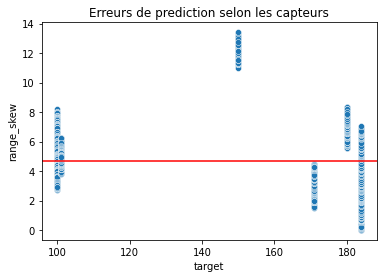

In [ ]:
sns.scatterplot(x=data['target'], y=data['range_skew'])
plt.title("Erreurs de prediction selon les capteurs")
plt.axhline(y=np.median(data['range_skew']),color = 'red')